## Hypothesis Testing

#### **Hypothesis test is used to EVALUATE TWO MUTUAL EXCLUSIVE STATEMENTS ON POPULATION using SAMPLE DATA**

##### H0 - Null Hypothesis

##### H1 - Alternate Hypothesis

#### **These tests can be performed using below techniques**

#### **->** P values

#### **->** T - test

#### **->** ANOVA test

#### **->** Z - test

#### **->** Chisquare test

### Steps:

    1. Make initial assumption (H0)

    2. Collect data

    3. Gather evidence to reject or not reject

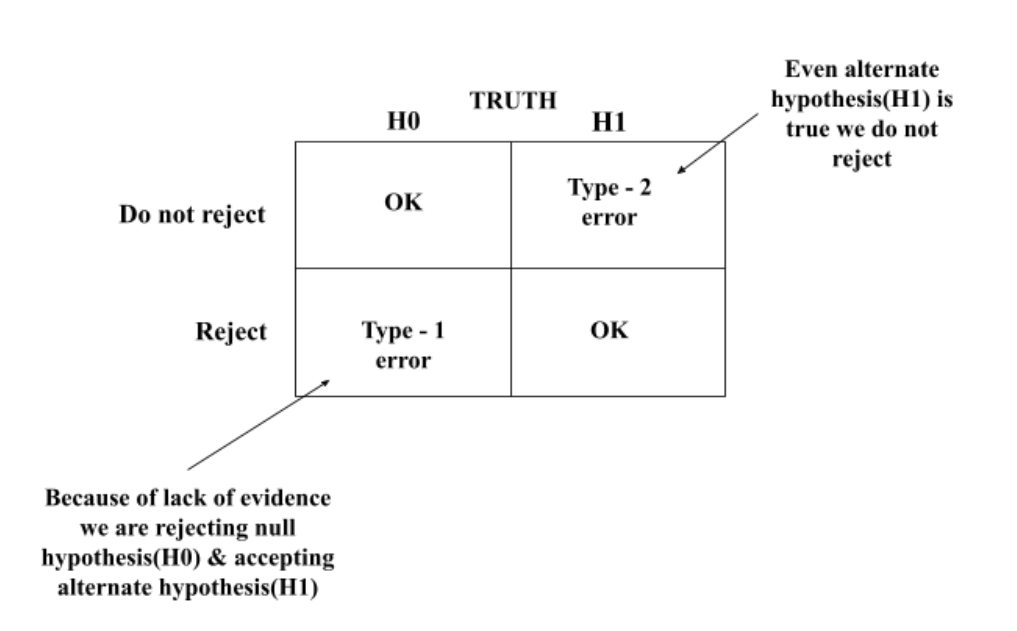

In [45]:
from IPython.display import Image
Image(filename=r'C:\Users\karth\Desktop\ML_Task\10.png')

##### **The above mentioned tests can be performed on below mentioned senarios:**

    One categorical variable/feature

    One numerical variable/feature

    Two categorical variables (categorical vs categorical)

    Two numerical variables (numerical vs numerical)

    One categorical and One numerical variables (categorical vs numerical)

## **One categorical feature**

##### **Initailly, we need to define a hypothesis statement or question**

**Example:**


##### **If p <= 0.05, we are rejecting null hypothesis**

##### **Else, we are accepting alternate hypothesis**

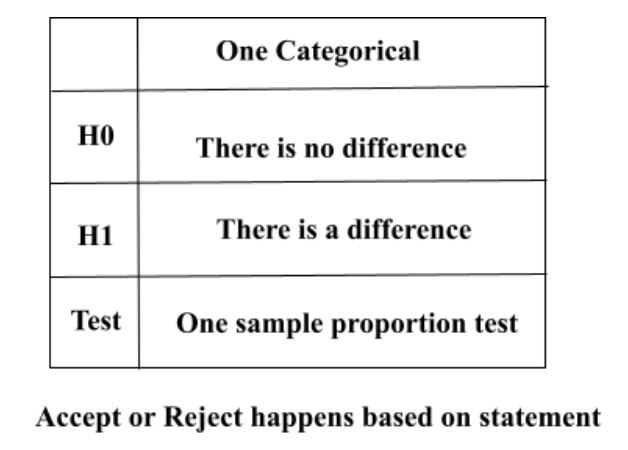

In [2]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\11.png')

## **Two categorical features**

##### **Initailly, we need to define a hypothesis statement or question**

**Example:**

    Null hypothesis(H0) - There is no statistical difference between 'loan' feature and 'y' feature(target column)

    Alternate hypothesis(H1) - There is a statistical difference between 'loan' feature and 'y' feature(target column)

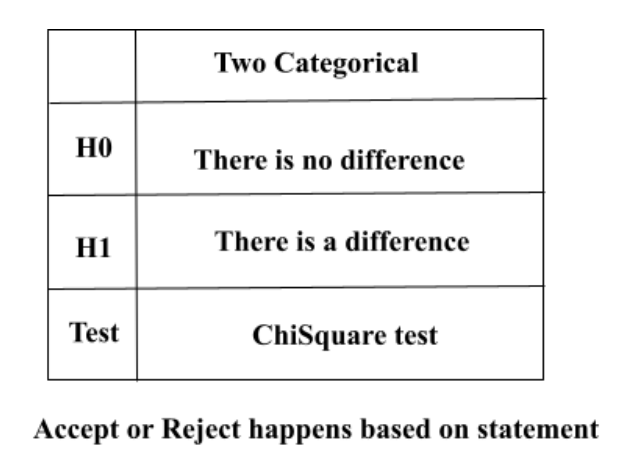

In [109]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\12.png')

### ChiSquare test

**The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.**

In [71]:
import pandas as pd

data = pd.read_csv(r"C:\Users\karth\Desktop\ML_Task\data\bank-additional-full.csv",sep=';')

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**we are taking 'loan' on x-axis,'y' feature on y-axis and applying crosstab**

**we will get a matrix showing how many have taken loan, not taken loan and unknown**

In [122]:
dataset_table = pd.crosstab(data['loan'],data['y'])
print(dataset_table)

y           no   yes
loan                
no       30100  3850
unknown    883   107
yes       5565   683


In [123]:
dataset_table.values

array([[30100,  3850],
       [  883,   107],
       [ 5565,   683]], dtype=int64)

**this data is given to us so lets name it as observed values**

In [124]:
#Observed Values

Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[30100  3850]
 [  883   107]
 [ 5565   683]]


**chi2_contingency() i.e., chi-square test of independence of variables in a contingency table**

In [125]:
import scipy.stats as stats

val = stats.chi2_contingency(dataset_table)

**below we can see the expected values in array**

In [126]:
val

(1.094027551150338,
 0.5786752870441754,
 2,
 array([[30125.39089055,  3824.60910945],
        [  878.47237059,   111.52762941],
        [ 5544.13673886,   703.86326114]]))

**so lets store this array in a variable called expected_values**

In [127]:
Expected_Values = val[3]

**by this observed and expected values there is some different we can see that**

**in order to find chisquare value, we need to also find degree of freedom**

In [128]:
no_of_rows = len(dataset_table.iloc[0:3,0])
no_of_columns = len(dataset_table.iloc[0,0:2])
print(no_of_rows)
print(no_of_columns)

3
2


**degree of freedom(ddof) formula is :**

**(no_of_rows-1)*(no_of_columns-1)**

In [129]:
ddof = (no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 2


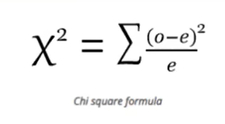

In [130]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\24.jpg')

In [131]:
from scipy.stats import chi2

chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic = chi_square[0] + chi_square[1]
print("chi-square statistic: ",chi_square_statistic)

chi-square statistic:  1.0940275511503377


In [132]:
# ppf means percent point function (inverse of 'cdf') at q of the given RV

critical_value = chi2.ppf(q = 1-alpha,df = ddof)
print('critical_value:',critical_value)

critical_value: 5.991464547107979


**We are more focused on p-value so we are calculating**

In [133]:
# p-value

p_value = 1-chi2.cdf(x = chi_square_statistic,df = ddof)

print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value: ',p_value)

Significance level:  0.05
Degree of Freedom:  2
p-value:  0.5786752870441755


##### **If p <= alpha, we are rejecting null hypothesis**

##### **Else, we are accepting alternate hypothesis**

**we can either use p-value or critical value to find the hypothesis**

In [137]:
if chi_square_statistic >= critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
print("---"*25)
if p_value <= alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

#------BASED ON HYPOTHESIS STATEMENT UNCOMMENT BELOW CONDITIONS-----

# if p_value <= alpha:
#     print("\n We are rejecting null hypothesis, and saying that **there is no statistical relationship** between loan and target feature 'y'")
# else:
#     print("\n We are accepting null hypothesis, and saying that **there is a statistical relationship** between loan and target feature 'y'")

Retain H0,There is no relationship between 2 categorical variables
---------------------------------------------------------------------------
Retain H0,There is no relationship between 2 categorical variables


## **One continuous feature**

##### **Initailly, we need to define a hypothesis statement or question**

**Example:**

    Null hypothesis(H0) - There is no statistical difference between sample mean and population mean in age feature

    Alternate hypothesis(H1) - There is a statistical difference between sample mean and population mean in age feature

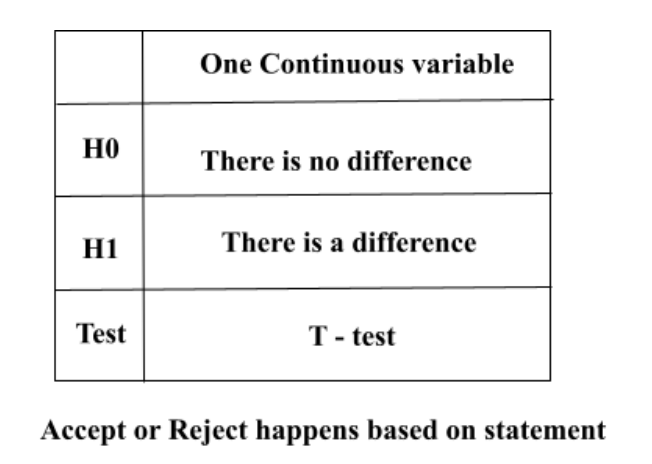

In [46]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\13.png')

## T - Test

**A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features**

**T-test has 2 types:**

**1. one sampled t-test**

**2. two-sampled t-test**

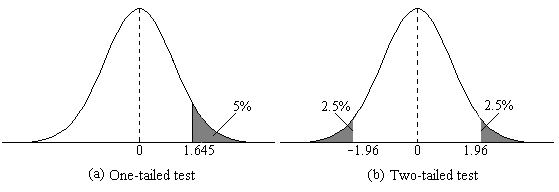

In [172]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\32.png')

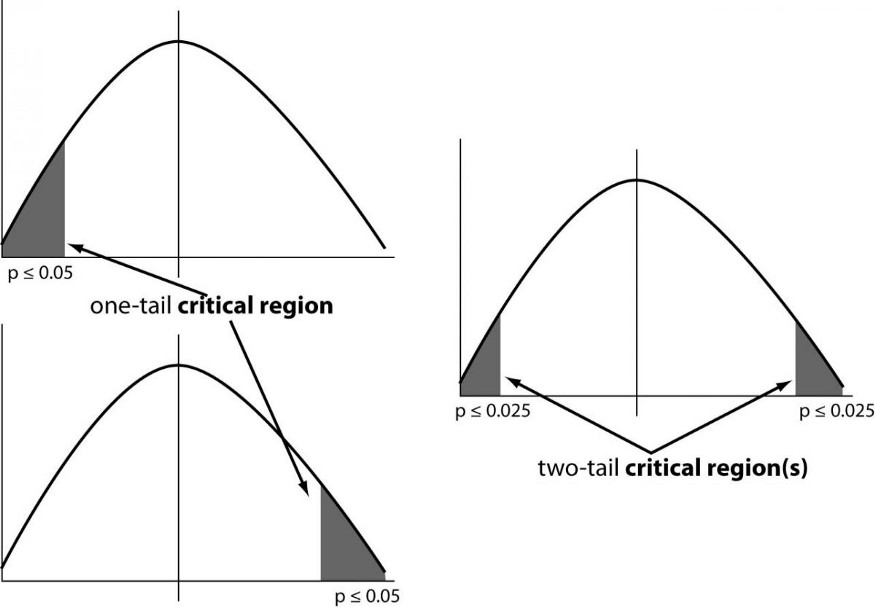

In [178]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\34.jpeg')

### One-sample T-test 

##### The test will tell us whether means of the sample and the population are different

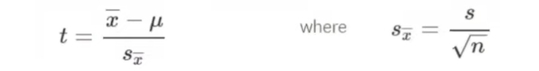

In [47]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\20.jpg')

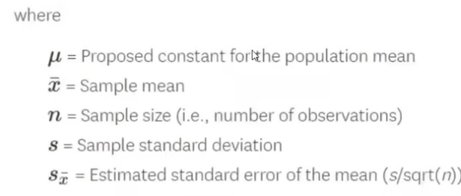

In [48]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\21.jpg')

**import data**

In [49]:
import pandas as pd

data = pd.read_csv(r"C:\Users\karth\Desktop\ML_Task\data\bank-additional-full.csv",sep=';')

**total number of customers with repect to age**

In [50]:
len(data['age'])

41188

**lets see mean of all customer ages**

In [51]:
import numpy as np

ages_mean = np.mean(data['age'])
print(ages_mean)

40.02406040594348


**lets take sample of customer ages randomly and take their mean**

In [52]:
sample_size = 10000
age_sample = np.random.choice(data['age'],sample_size)
#print(age_sample)

**our objective is to see their is any significant difference between sample mean of age column with hole population mean**

**This can be done using ONE SAMPLE T - TEST**

**ONE SAMPLE T - TEST is used to compute P-Value**

##### **If, p < 0.05, we are rejecting null hypothesis**

##### **Else, we are accepting alternate hypothesis**

In [53]:
from scipy import stats
from scipy.stats import ttest_1samp

# ttest_1samp() calculates the T-test for the mean of ONE group of scores.
ztest ,pval = ttest_1samp(age_sample, 40) # We need to give sample ages list and population mean value
print("pvalue: ",float(pval))

pvalue:  0.04754944243644075


**based on pvalue we need to write condition**

In [54]:
if pval<0.05:
    print("\n We are rejecting null hypothesis, and saying that **there is no statistical difference** between sample mean and population mean in age feature")
else:
    print("\n We are accepting null hypothesis, and saying that **there is a statistical difference** between sample mean and population mean in age feature")


 We are rejecting null hypothesis, and saying that **there is no difference** between sample mean and population mean in age feature


## Z - Test

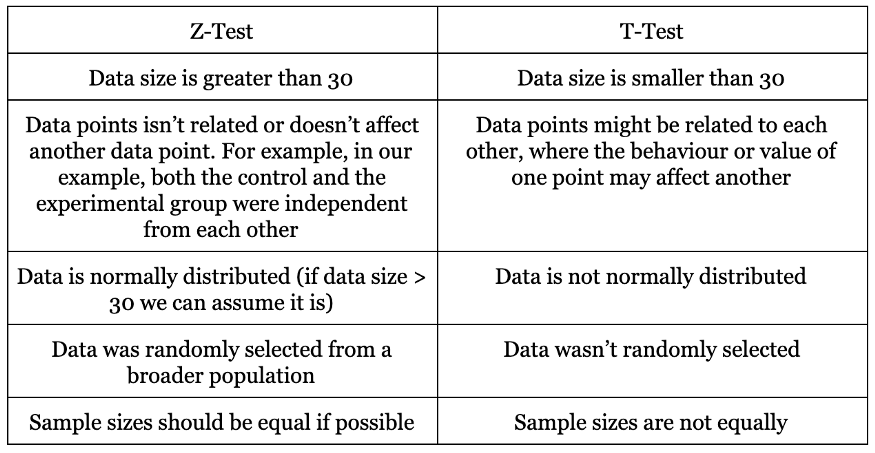

In [176]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\31.png')

In [55]:
# from scipy import stats
# from statsmodels.stats import weightstats as stests

# # PRESS SHIFT + TAB to see description of ztest
# ztest2 ,pval2 = stests.ztest(x1 = age_sample, x2 = None, value = 40) # we are giving only one sample
# print("pvalue: ",float(pval2))
# if pval2<0.05:
#     print("\n We are rejecting null hypothesis, and saying that **there is no statistical difference** between sample mean and population mean in age feature")
# else:
#     print("\n We are accepting null hypothesis, and saying that **there is a statistical difference** between sample mean and population mean in age feature")

pvalue:  0.04752210030929726

 We are rejecting null hypothesis, and saying that **there is no difference** between sample mean and population mean in age feature


### Two-sample T-test

**The independent samples T - test or 2-sample T - test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples T - test is a parametric test. This test is also known as: Independent T - test**

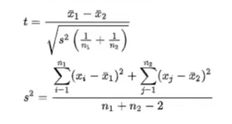

In [65]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\23.jpg')

**I am generating sample data using stats.poisson.rvs()**

**If we have to perform TWO SAMPLE T - TEST then two groups showed be independent with different means**

In [64]:
import numpy as np
import scipy.stats as stats
import math

np.random.seed(6)

school_ages = stats.poisson.rvs(loc=18,mu=35,size=1500) # Left most value is 18, mean is 35 and total number of students are 1500
classA_ages = stats.poisson.rvs(loc=18,mu=30,size=60) # Left most value is 18, mean is 30 and total number of students are 60
classB_ages = stats.poisson.rvs(loc=18,mu=33,size=60) # Left most value is 18, mean is 33 and total number of students are 60

print("Mean age of entire school: ",school_ages.mean())
print("Mean age of Class A students: ",classA_ages.mean())
print("Mean age of Class B students: ",classB_ages.mean())

# PRESS SHIFT + TAB to see description of ttest_ind()
# ttest_ind() calculates the T-test for the means of *two independent* samples of scores.
_ , p_value = stats.ttest_ind(a = classA_ages, b = ClassB_ages, equal_var=False)
print("pvalue: ", p_value)

if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("\n We are rejecting null hypothesis, there is no statistical difference between class A mean age and class B mean age")
else:
    print("\n We are accepting null hypothesis, there is a statistical difference between class A mean age and class B mean age")

Mean age of entire school:  53.303333333333335
Mean age of Class A students:  46.9
Mean age of Class B students:  50.68333333333333
pvalue:  0.00030935839774215933

 We are rejecting null hypothesis, there is no difference between class A mean age and class B mean age


#### **NOTE::: In One Sample T-test we are taking sample from same population but in Two Sample T-test we are taking samples form different groups**

## Paired T-test

**When you want to check how different samples from the same group are, you can go for a paired T-test**

**ttest_rel() calculates the t-test on TWO RELATED samples of scores, a and b.**

    _ , p_value = stats.ttest_rel(a = ,b = )

In [66]:
students_weight1 = [25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
students_weight2 = students_weight1 + stats.norm.rvs(scale=5,loc=-1.25,size=15) # Adding weigths to previous list

print(students_weight1)
print(students_weight2)

weight_df=pd.DataFrame({"students_weight_1":np.array(students_weight1),
                         "students_weight_2":np.array(students_weight2),
                       "students_weight_change":np.array(students_weight2) - np.array(students_weight1)})

_ , p_value = stats.ttest_rel(a = students_weight1,b = students_weight2)
print("pvalue: ", p_value)

if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("\n We are rejecting null hypothesis, there is no statistical difference between weight of students from last year to present year")
else:
    print("\n We are accepting null hypothesis, there is a statistical difference between weight of students from last year to present year")

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[23.05339813 22.31769305 23.45834972 26.64869425 30.28145396 34.63232004
 16.51491535 28.02824248 32.13278326 23.37247705 26.25327636 24.8162077
 25.07676606 27.8542075  34.24205326]
pvalue:  0.00288079766277428

 We are rejecting null hypothesis, there is no statistical difference between weight of students from last year to present year


## **Two continuous features**

**MOSTLY USED FOR FEATURE SELECTION**

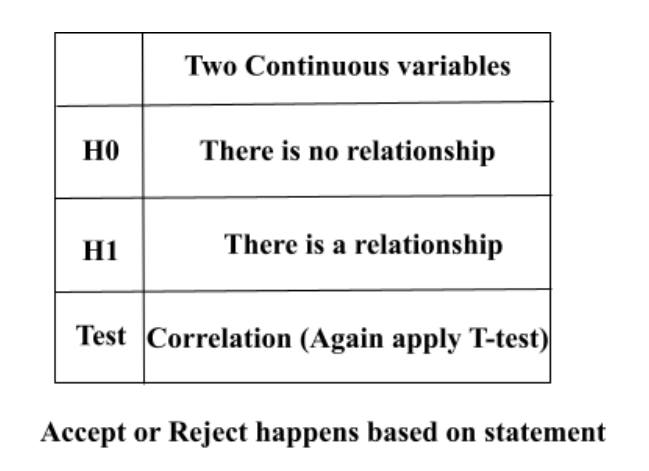

In [5]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\14.png')

In [67]:
import pandas as pd

data = pd.read_csv(r"C:\Users\karth\Desktop\ML_Task\data\bank-additional-full.csv",sep=';')

**Correlation values ranges from -1 to 1**

    1 means highly positive correlated

    0 means no correlation

    -1 means highly negative correlated

In [68]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


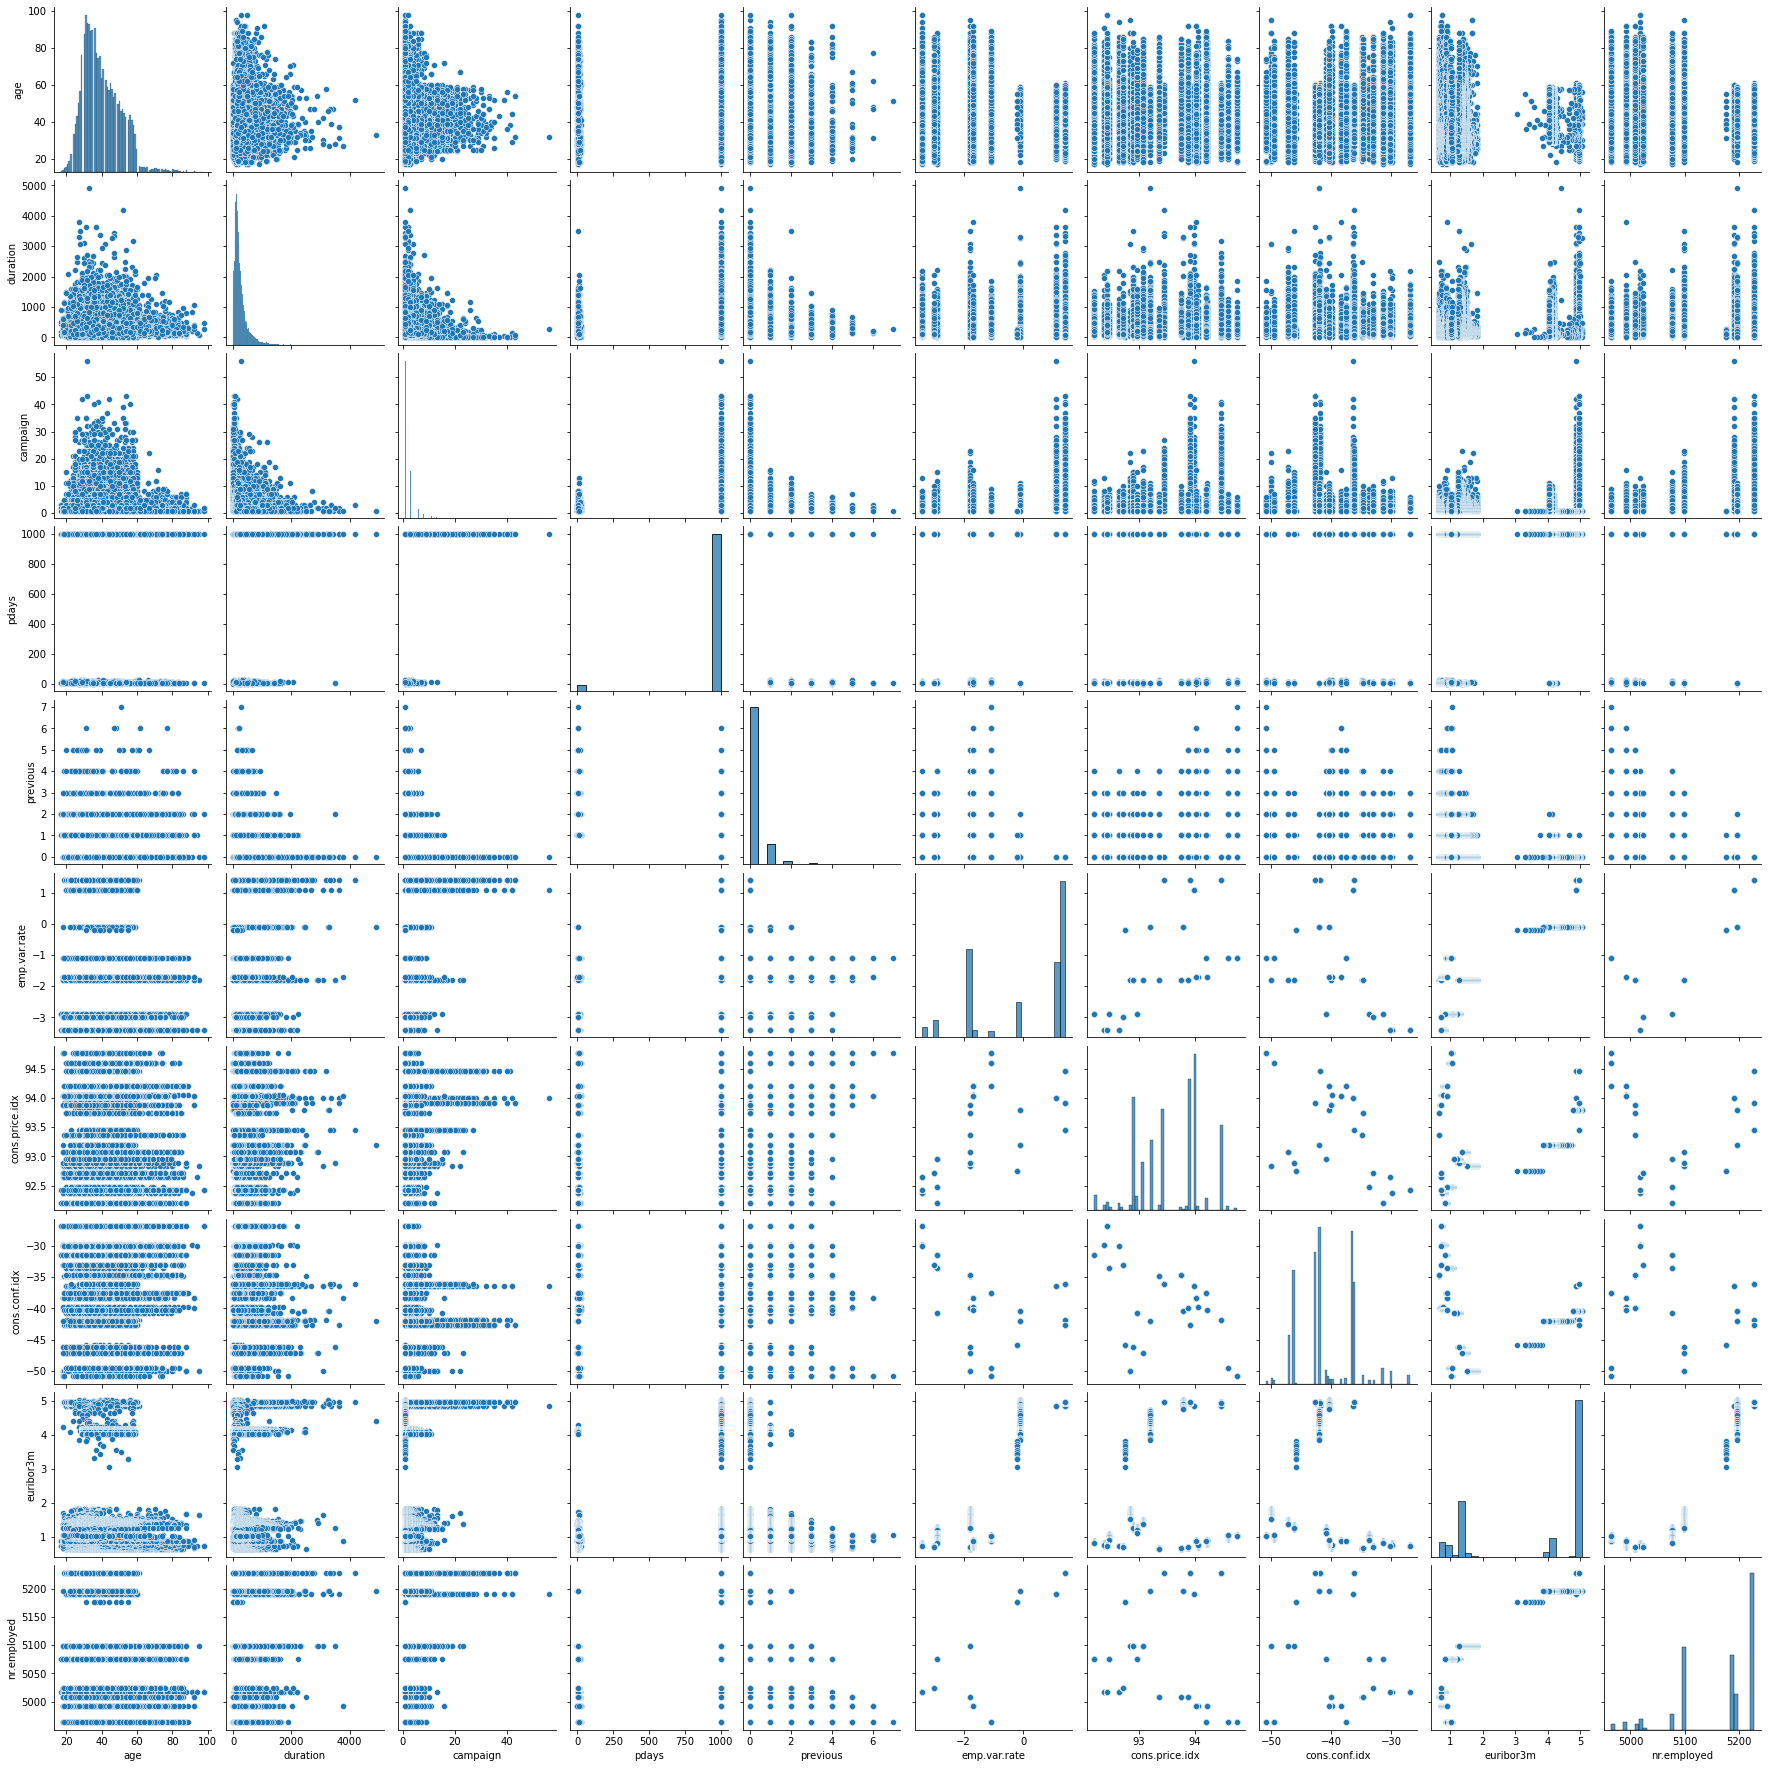

In [70]:
import seaborn as sns

sns.pairplot(data)

## **One categorical (having two categories) VS One numerical**

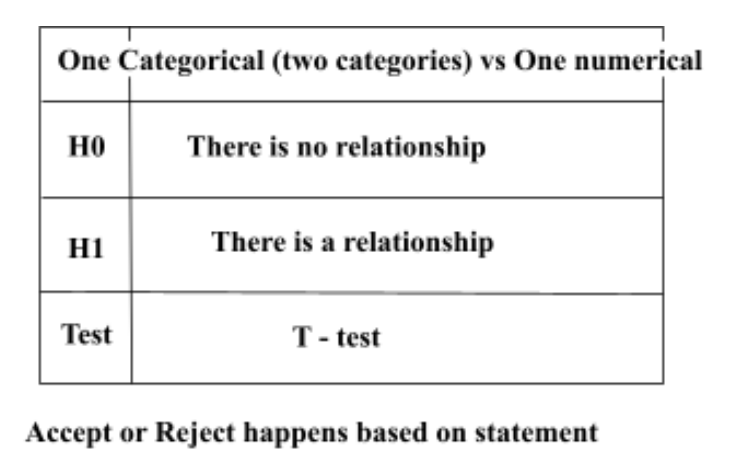

In [8]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\15.png')

## **One categorical (having more than two categories) VS One numerical**

##### **Initailly, we need to define a hypothesis statement or question**

**Example:**

    Null hypothesis(H0) - There is no statistical difference between marital feature and cons.price.idx feature

    Alternate hypothesis(H1) - There is a statistical difference between marital feature and cons.price.idx feature

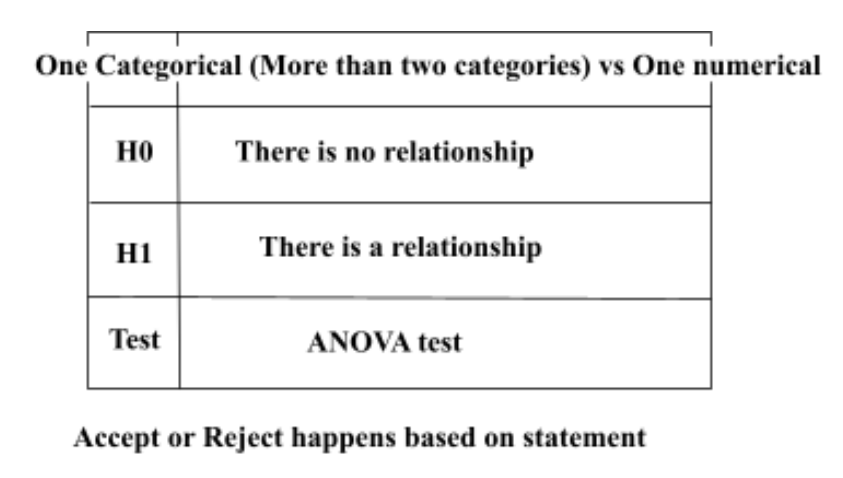

In [153]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\16.png')

### ANOVA Test (F-Test)

**The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.**

**For example, if we wanted to test whether cons.price.idx differs based on some categorical variable like marital, we have to compare the means of each level or group the variable**

### One Way F-test(ANOVA)

**It tell whether two or more groups are similar or not based on their mean similarity and f-score.**

**Example : There are 4 different category of marital feature and their cons.price.idx and need to check whether all 4 group are similar or not**

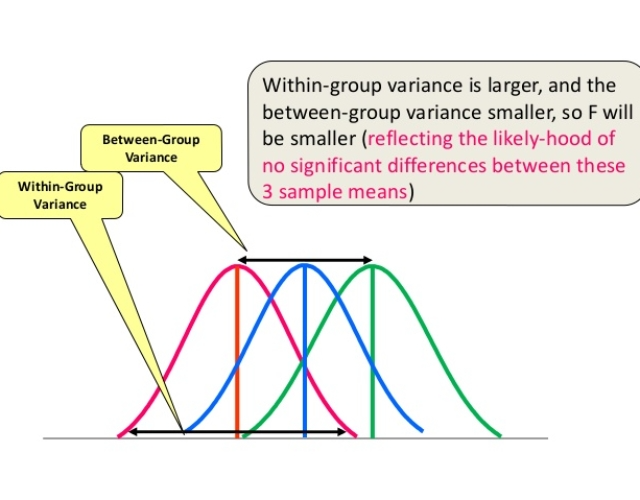

In [177]:
Image(filename=r'C:\Users\karth\Desktop\ML_Task\33.png')

In [154]:
import pandas as pd

data = pd.read_csv(r"C:\Users\karth\Desktop\ML_Task\data\bank-additional-full.csv",sep=';')
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [142]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

**selecting one continuous and one categorical feature**

In [155]:
df_anova = data[['cons.price.idx','marital']]

**see what are all unique categorical groups**

In [156]:
grps = pd.unique(df_anova.marital.values)
print(grps)

In [158]:
d_data = {grp:df_anova['cons.price.idx'][df_anova.marital == grp] for grp in grps}
print(d_data)

**calculating f-value and p-value, we are more interested in p-value**

In [164]:
F, p_value = stats.f_oneway(d_data['married'], d_data['single'], d_data['divorced'], d_data['unknown'])
print("pvalue: ",p_value)

pvalue:  2.391726274466331e-36


##### **If, p < 0.05, we are rejecting null hypothesis**

##### **Else, we are accepting alternate hypothesis**

In [162]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("\n We are rejecting null hypothesis, there is no statistical difference between marital feature and cons.price.idx feature")
else:
    print("\n We are accepting null hypothesis, there is a statistical difference between marital feature and cons.price.idx feature")


 We are rejecting null hypothesis, there is no statistical difference between marital feature and cons.price.idx feature


### Two Way F-test 

**Two way F-test is extension of 1-way f-test, it is used when we have 2 independent variable and 2+ groups. 2-way F-test does not tell which variable is dominant. if we need to check individual significance then Post-hoc testing need to be performed.**

In [170]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# df_anova2 = pd.read_csv(r"C:\Users\karth\Desktop\ML_Task\data\bank-additional-full.csv",sep=';')

# model = ols('age ~ C(job)*C(marital)', df_anova2).fit()
# #model.summary()
# print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

# res = sm.stats.anova_lm(model, typ= 2)

# res

_______

### References:

**https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce**

**https://github.com/krishnaik06/T-test-an-Correlation-using-python/blob/master/Hypothesis_Testing.ipynb**

___________